In [78]:
!pip install -U scikit-learn

In [94]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [57]:
data=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241028.csv")
data

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,NaN
1,30/08/2024,16436,10705,225,19026,3925,59.0
2,15/09/2023,15499,10671,267,18421,4519,61.0
3,28/12/2021,1756,2352,0,3775,0,13.0
4,11/01/2023,10536,8347,223,14072,0,48.0
...,...,...,...,...,...,...,...
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0


**preprocess the data**

In [95]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.fillna(data.median(), inplace=True)
data.set_index('Date', inplace=True)

In [36]:
data.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,DayOfWeek,IsWeekend,Year,Month,Weekday
Date,,,,,,,,,,,
2019-01-07 00:00:00,15987,9962,407,21223,3715,39.0,0,False,2019,1,0
2022-02-06 12:00:00,16436,10705,225,19026,3925,59.0,6,True,2022,2,6
2022-02-06 12:00:00,15499,10671,267,18421,4519,61.0,6,True,2022,2,6
2022-02-06 12:00:00,1756,2352,0,3775,0,13.0,6,True,2022,2,6
2023-11-01 00:00:00,10536,8347,223,14072,0,48.0,2,False,2023,11,2


In [37]:
data.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,DayOfWeek,Year,Month,Weekday
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.979145,4.820125,2021.849844,3.773723,4.820125
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.738518,1.928690,0.995754,3.088319,1.928690
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000,4.000000,2022.000000,2.000000,4.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000,6.000000,2022.000000,2.000000,6.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,67.750000,6.000000,2022.000000,5.000000,6.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000,6.000000,2024.000000,12.000000,6.000000


<ipython-input-96-77f12a0eb5b3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


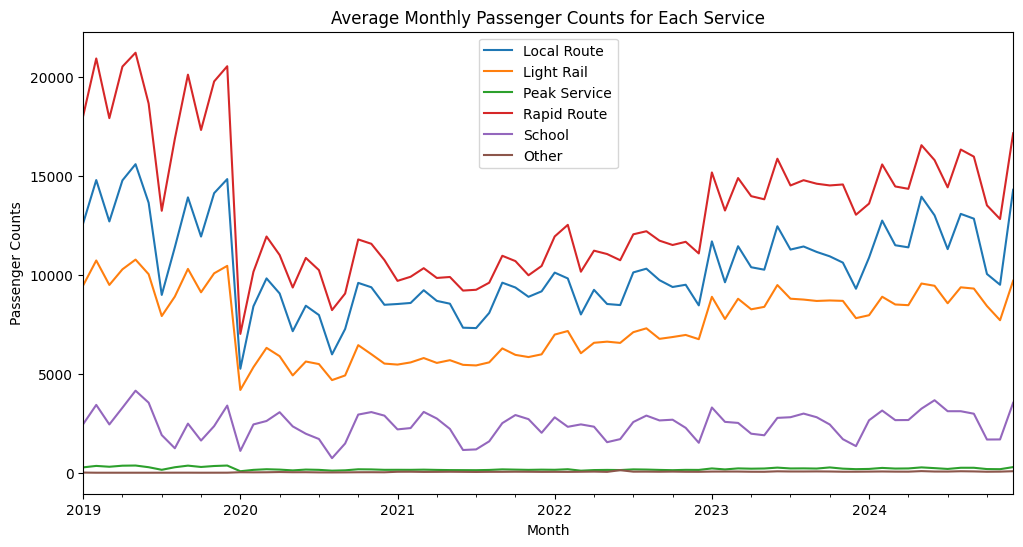

In [96]:
monthly_data = data.resample('M').mean()
monthly_data.plot(figsize=(12, 6))
plt.title('Average Monthly Passenger Counts for Each Service')
plt.xlabel('Month')
plt.ylabel('Passenger Counts')
plt.legend()
plt.show()

In [17]:
average_monthly_counts = monthly_data.mean()


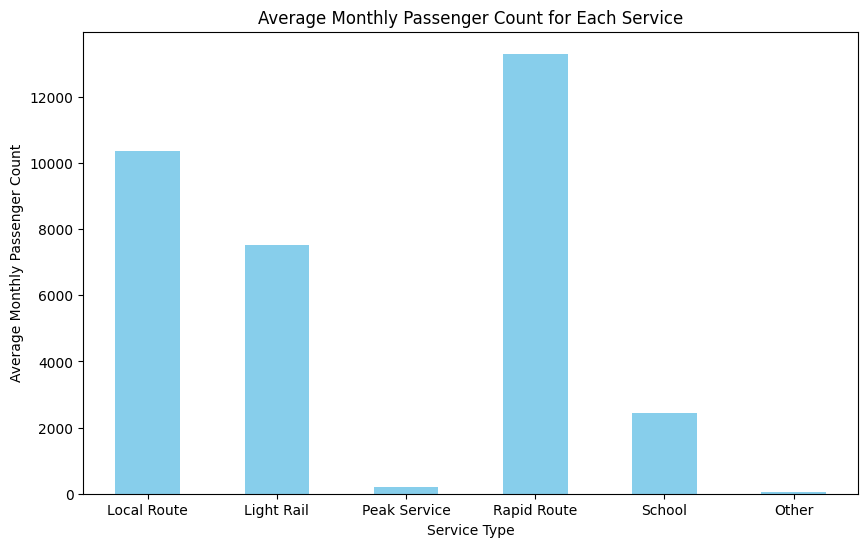

In [20]:
plt.figure(figsize=(10, 6))
average_monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Passenger Count for Each Service')
plt.xlabel('Service Type')
plt.ylabel('Average Monthly Passenger Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
data['DayOfWeek'] = data.index.dayofweek
data['IsWeekend'] = data['DayOfWeek'] >= 5

In [22]:
weekday_avg = data[data['IsWeekend'] == False].mean()
weekend_avg = data[data['IsWeekend'] == True].mean()

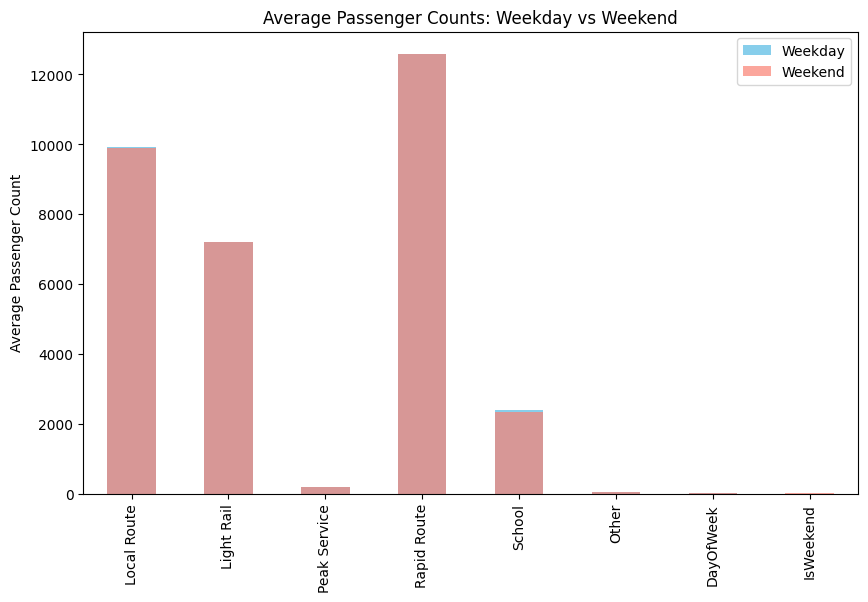

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
weekday_avg.plot(kind='bar', color='skyblue', ax=ax, label='Weekday')
weekend_avg.plot(kind='bar', color='salmon', ax=ax, alpha=0.7, label='Weekend')
plt.title('Average Passenger Counts: Weekday vs Weekend')
plt.ylabel('Average Passenger Count')
plt.legend()
plt.show()

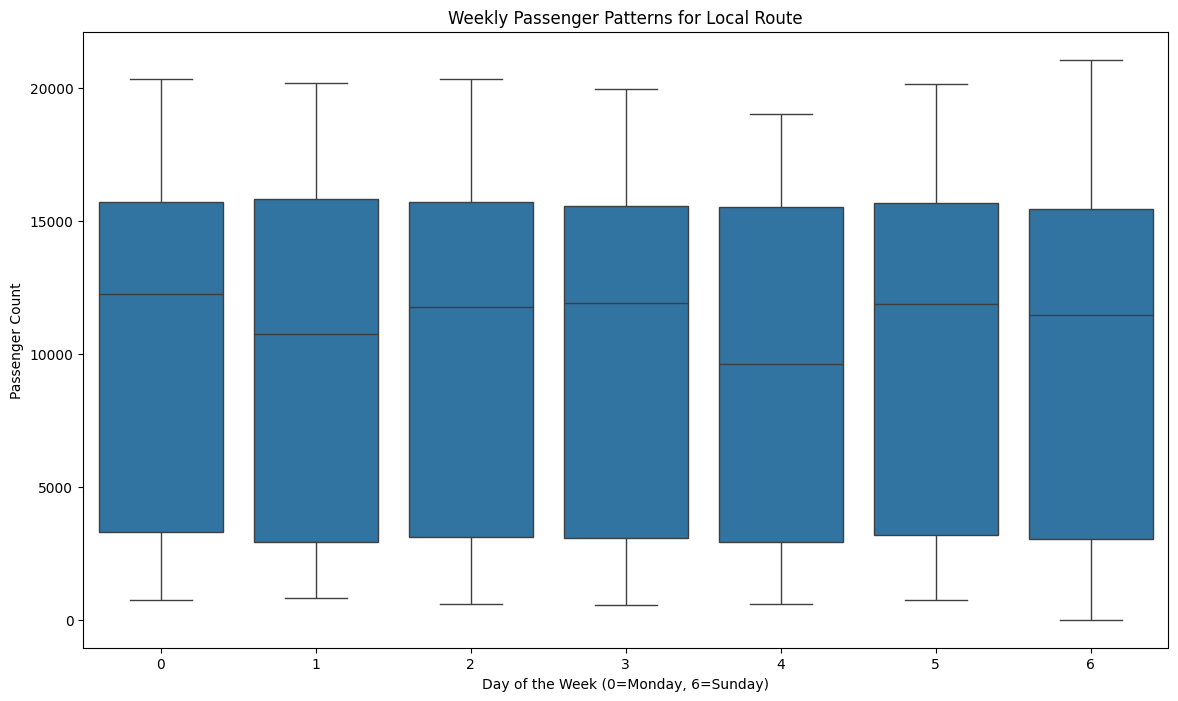

In [31]:
data['Weekday'] = data.index.dayofweek
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Weekday', y='Local Route')  # Change 'Local Route' to other types if needed
plt.title("Weekly Passenger Patterns for Local Route")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Passenger Count")
plt.show()

In [35]:
data['DayOfWeek'] = data.index.dayofweek
weekly_avg = data.groupby('DayOfWeek').mean()
print("\n**Average Ridership by Day of the Week:**")
print(weekly_avg)


**Average Ridership by Day of the Week:**
            Local Route   Light Rail  Peak Service   Rapid Route       School  \
DayOfWeek                                                                       
0          10290.342593  7410.129630    188.805556  12923.972222  2602.972222   
1           9747.879630  7134.342593    178.444444  12541.342593  2307.166667   
2          10153.084906  7290.905660    192.179245  12737.330189  2497.952830   
3          10194.500000  7327.861111    187.842593  12967.009259  2512.675926   
4           9197.825688  6849.137615    162.000000  11805.229358  2084.678899   
5          10186.311927  7362.495413    188.376147  12960.220183  2403.853211   
6           9856.270866  7178.543307    177.893701  12567.852756  2328.166929   

               Other  IsWeekend         Year     Month  Weekday  
DayOfWeek                                                        
0          43.259259        0.0  2021.648148  6.500000      0.0  
1          39.037037        0

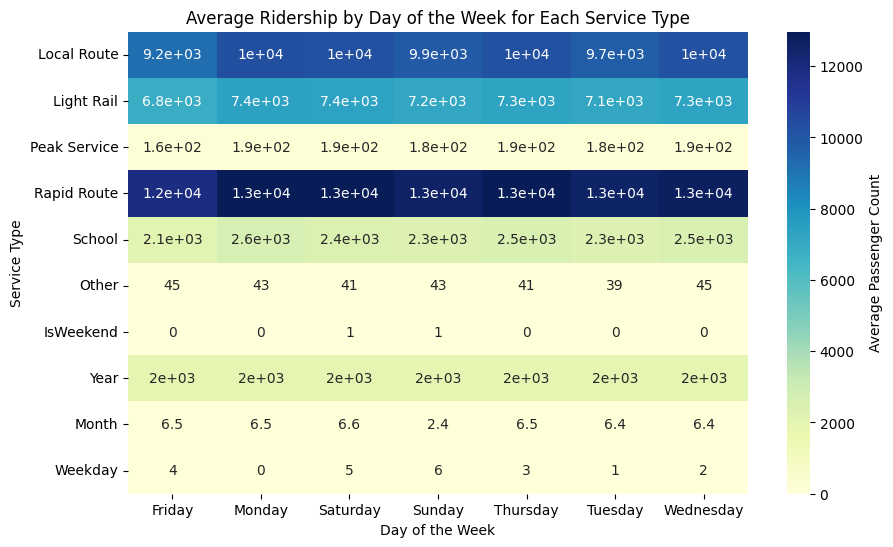

In [40]:
data['DayOfWeek'] = data.index.day_name()
avg_by_day = data.groupby('DayOfWeek').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(avg_by_day.transpose(), annot=True, cmap="YlGnBu", cbar_kws={'label': 'Average Passenger Count'})
plt.title("Average Ridership by Day of the Week for Each Service Type")
plt.xlabel("Day of the Week")
plt.ylabel("Service Type")
plt.show()

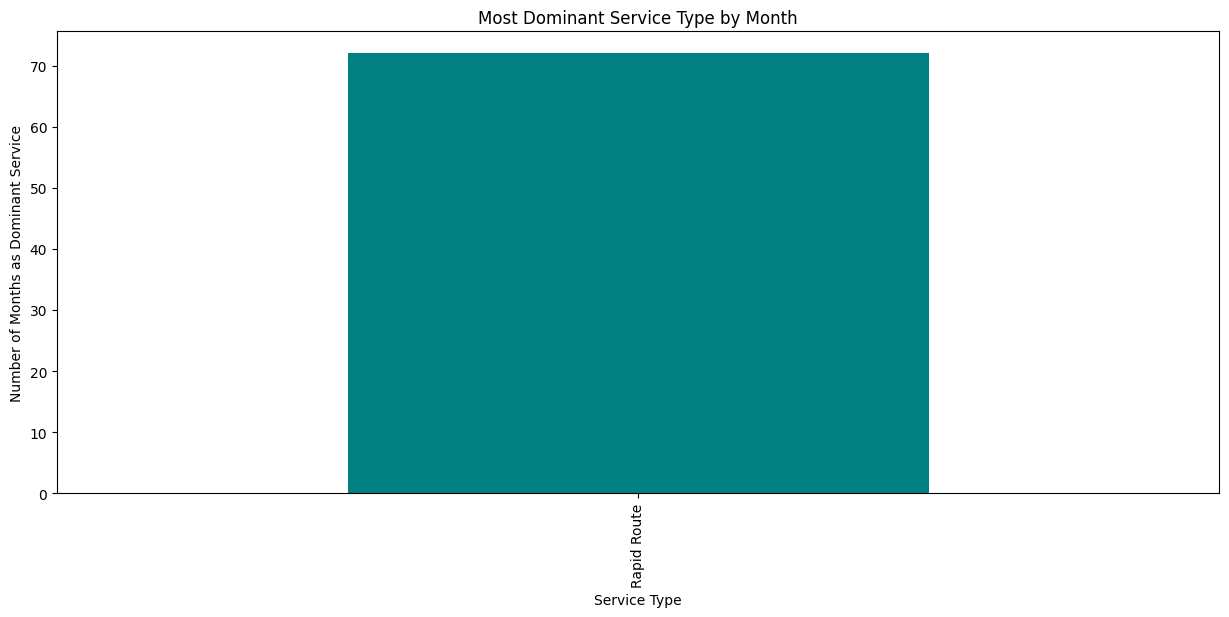

In [44]:
dominant_service = monthly_data.idxmax(axis=1)

plt.figure(figsize=(15, 6))
dominant_service.value_counts().plot(kind='bar', color='teal')
plt.title("Most Dominant Service Type by Month")
plt.xlabel("Service Type")
plt.ylabel("Number of Months as Dominant Service")
plt.show()

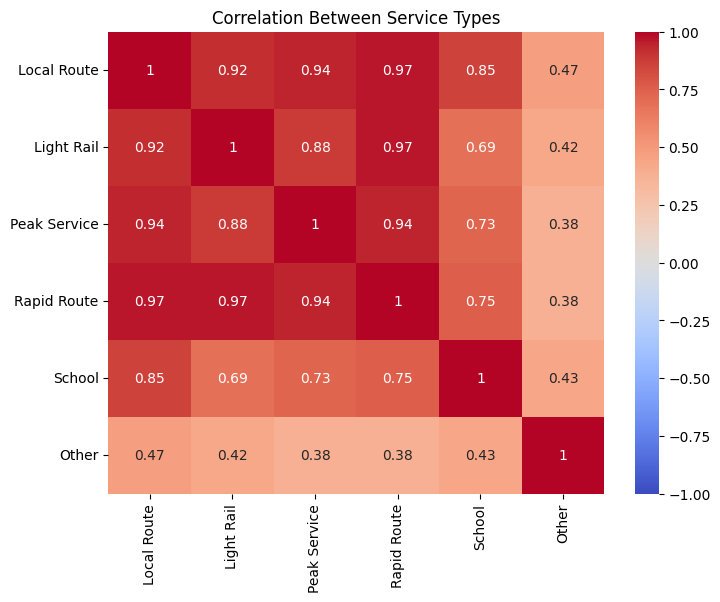

In [45]:
correlation_matrix = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Service Types")
plt.show()

In [98]:
service_type = 'Local Route'
monthly_data['Lag_1'] = monthly_data[service_type].shift(1)
monthly_data['Lag_2'] = monthly_data[service_type].shift(2)
monthly_data['Lag_3'] = monthly_data[service_type].shift(3)
monthly_data.dropna(inplace=True)

In [99]:
X = monthly_data[['Lag_1', 'Lag_2', 'Lag_3']]
y = monthly_data[service_type]


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


INITIALIZE AND TRAIN THE XGBOOST MODEL

In [102]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [105]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score:",r2)

Mean Squared Error: 2851342.4368799888
Mean Absolute Error: 1220.0999581473213
R² Score: -0.1986938633590385


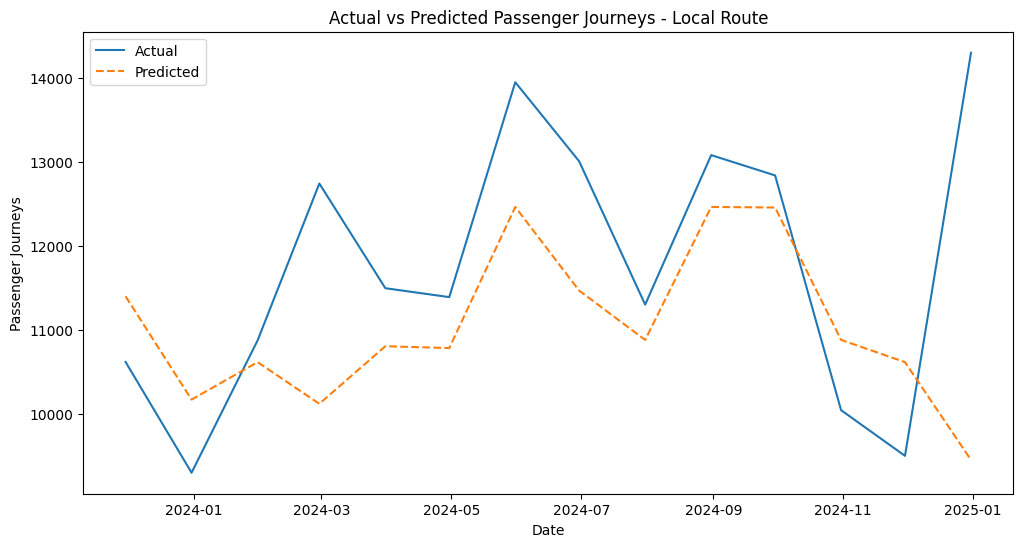

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title(f"Actual vs Predicted Passenger Journeys - {service_type}")
plt.xlabel("Date")
plt.ylabel("Passenger Journeys")
plt.legend()
plt.show()